In [11]:
import sys
# Add parent directory to the module search path
sys.path.append('../')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import matplotlib.pyplot as plt

In [13]:
# load the data
facialpoints_df = pd.read_csv('../data/KeyFacialPoints.csv')

In [14]:
# Get first image from 'Image' column
facialpoints_df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [15]:
# Since values for the image is given as space separated string, we will need to separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [16]:
facialpoints_df['Image'][0][0]

array([238, 236, 237, 238, 240, 240, 239, 241, 241, 243, 240, 239, 231,
       212, 190, 173, 148, 122, 104,  92,  79,  73,  74,  73,  73,  74,
        81,  74,  60,  64,  75,  86,  93, 102, 100, 105, 109, 114, 121,
       127, 132, 134, 137, 137, 140, 139, 138, 137, 137, 140, 141, 143,
       144, 147, 148, 149, 147, 147, 148, 145, 147, 144, 146, 147, 147,
       143, 134, 130, 130, 128, 116, 104,  98,  90,  82,  78,  85,  88,
        86,  80,  77,  87, 108, 111, 115, 128, 133, 188, 242, 252, 250,
       248, 251, 250, 250, 250])

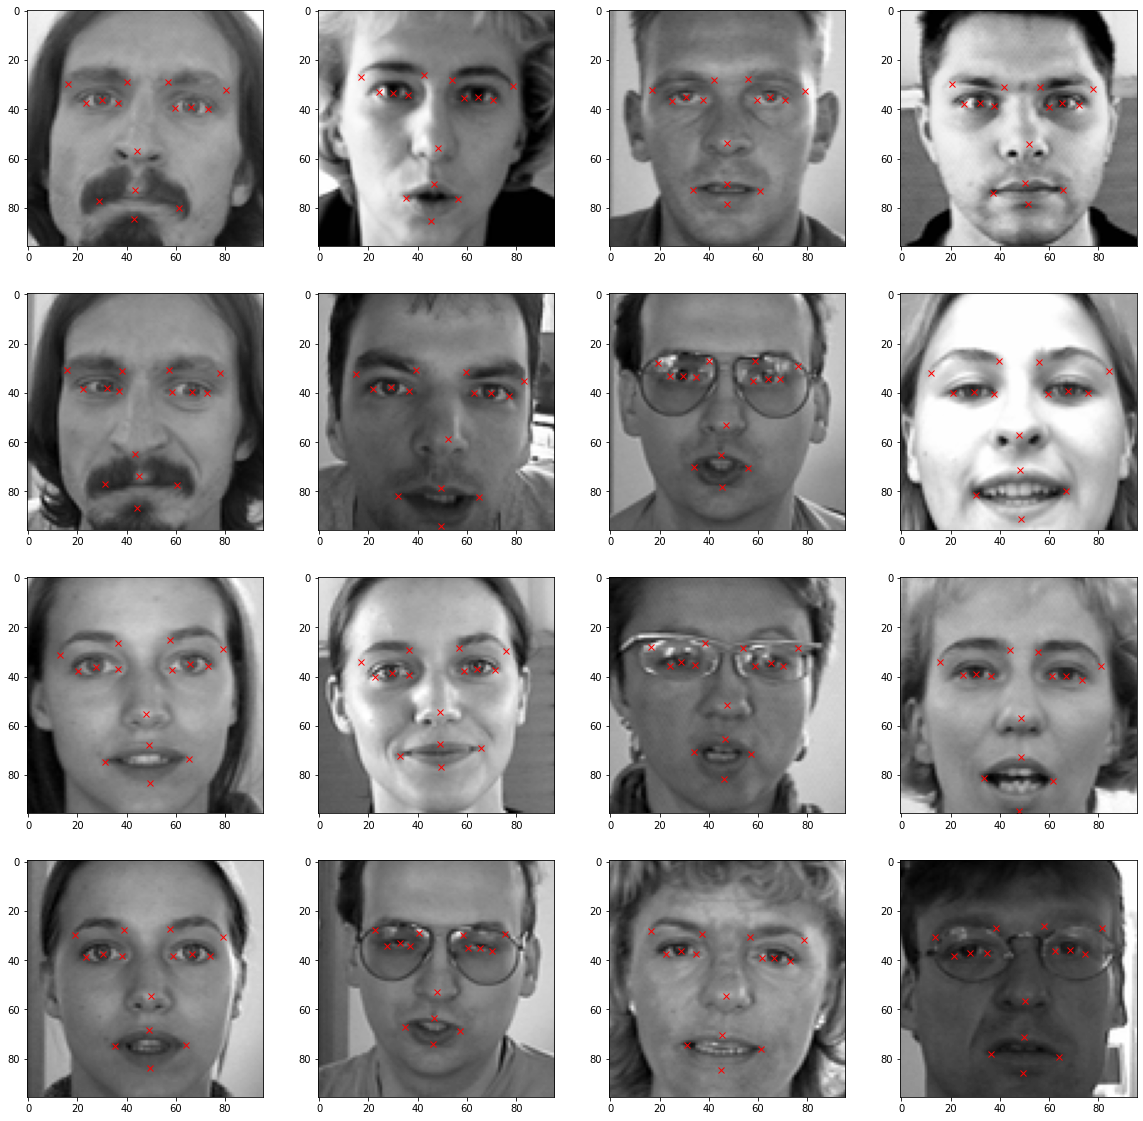

In [17]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

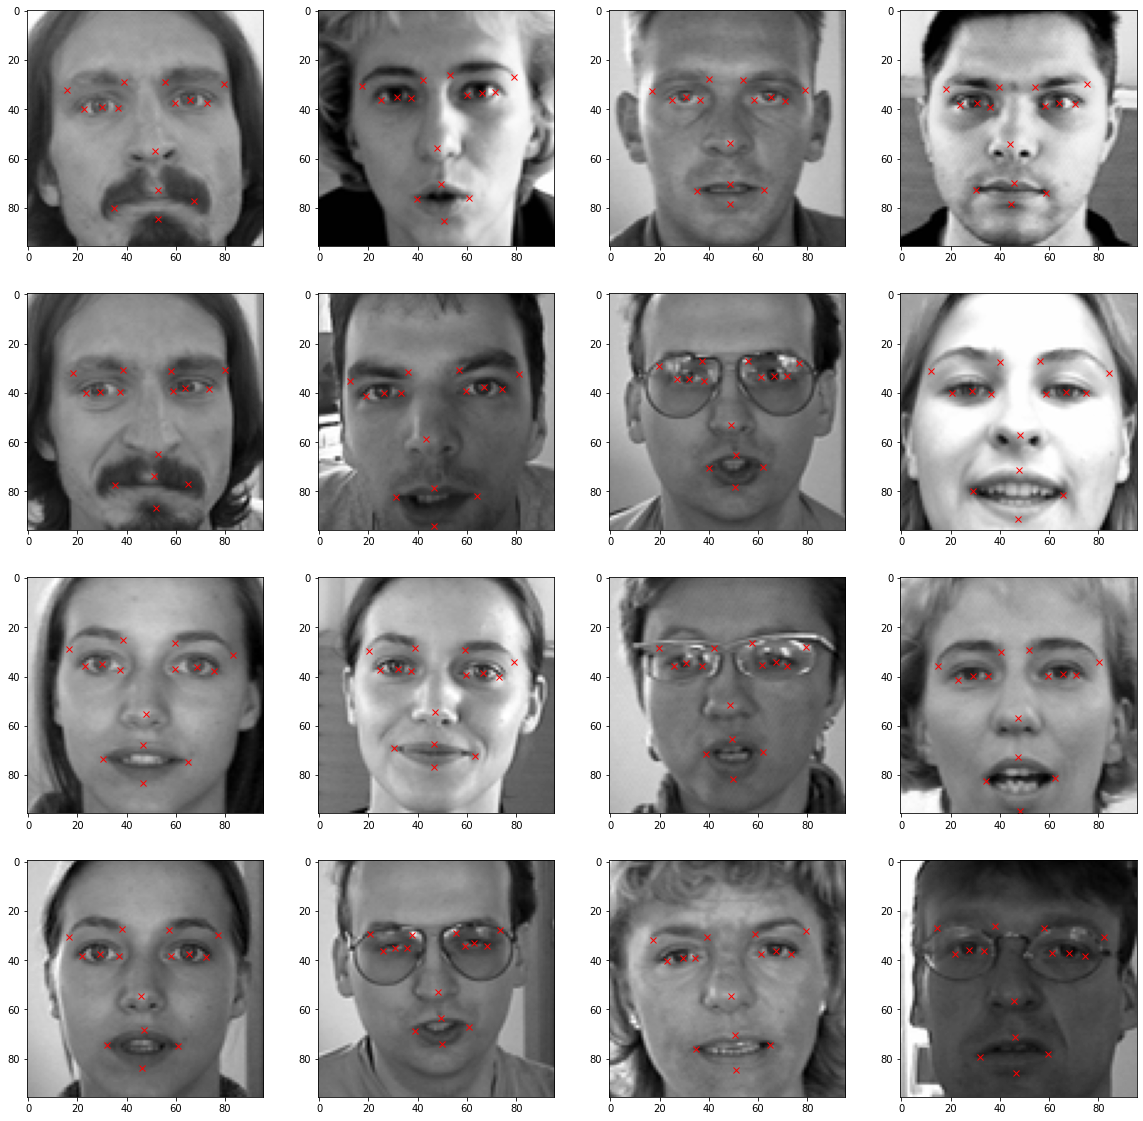

In [18]:
facialpoints_df_copy = copy.copy(facialpoints_df)
# obtain the header of the DataFrame (names of columns) 
columns = facialpoints_df_copy.columns[:-1]
# Now Let's flip the image column horizontally 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))
# Since we are flipping the images horizontally, y coordinate values would be the same
# X coordinate values only would need to change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

# View the Horizontally flipped images
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df_copy['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[i][j-1], facialpoints_df_copy.loc[i][j], 'rx')


In [19]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))
facialpoints_df_augmented.shape

(4280, 31)

In [20]:
# Create a shallow copy of the original DataFrame
facialpoints_df_copy = copy.copy(facialpoints_df)

# Apply random brightness adjustment to each image in the 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))

# View the brightened images
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df_copy['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[i][j-1], facialpoints_df_copy.loc[i][j], 'rx')

In [31]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

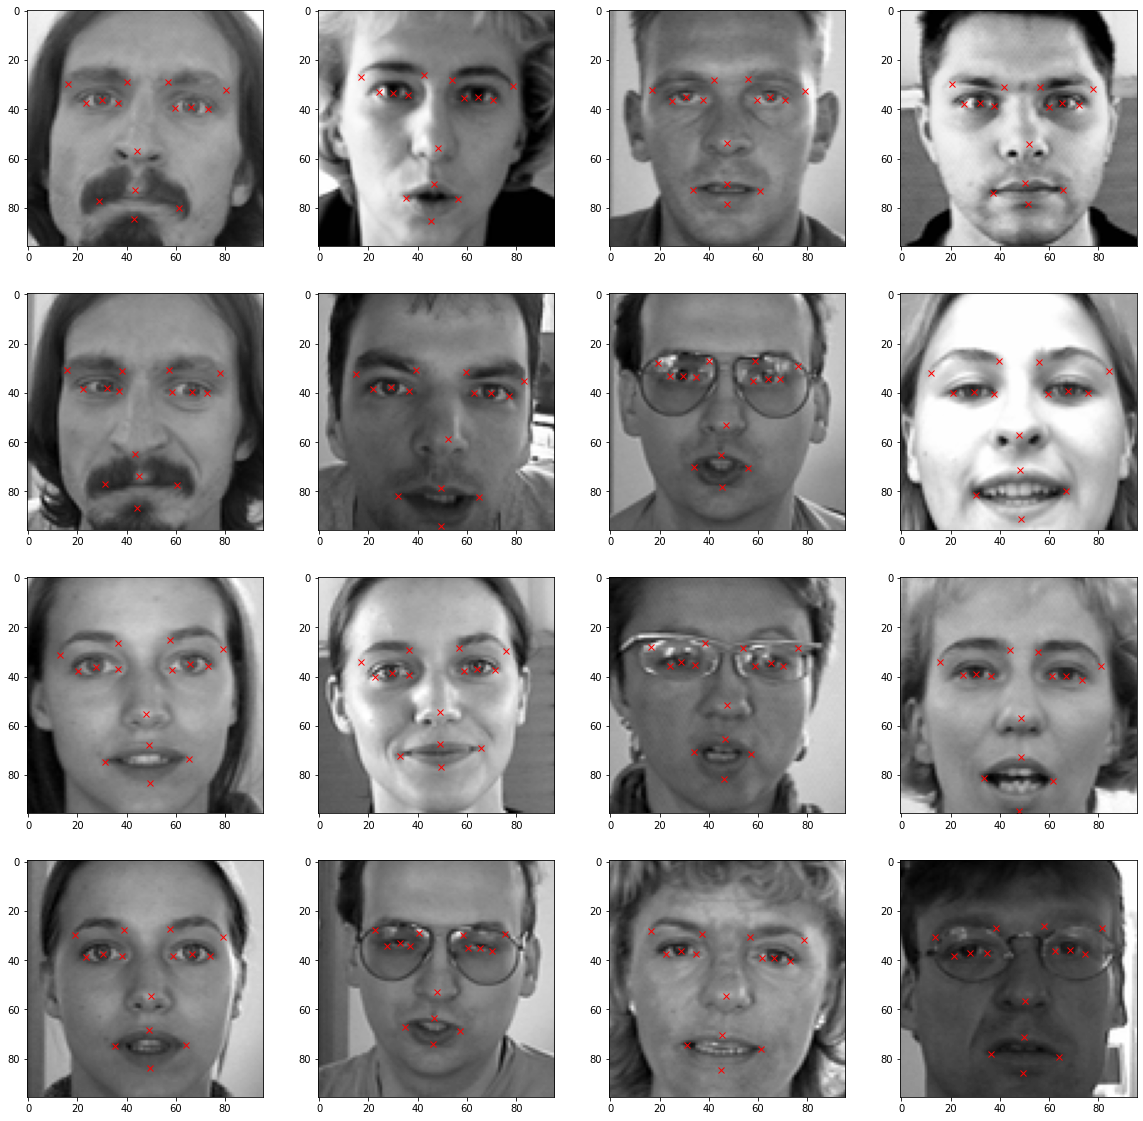

In [32]:
# Create a copy of the original DataFrame
facialpoints_df_copy = copy.copy(facialpoints_df)

# Apply random darkness adjustment to each image in 'Image' column
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(0, 0.2) * x, 0.0, 255.0))

# View the darkened images
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df_copy['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[i][j-1], facialpoints_df_copy.loc[i][j], 'rx')

In [33]:
# Concatenate original and darkness-adjusted DataFrames
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))

# Get shape of the augmented DataFrame
facialpoints_df_augmented.shape

(8560, 31)

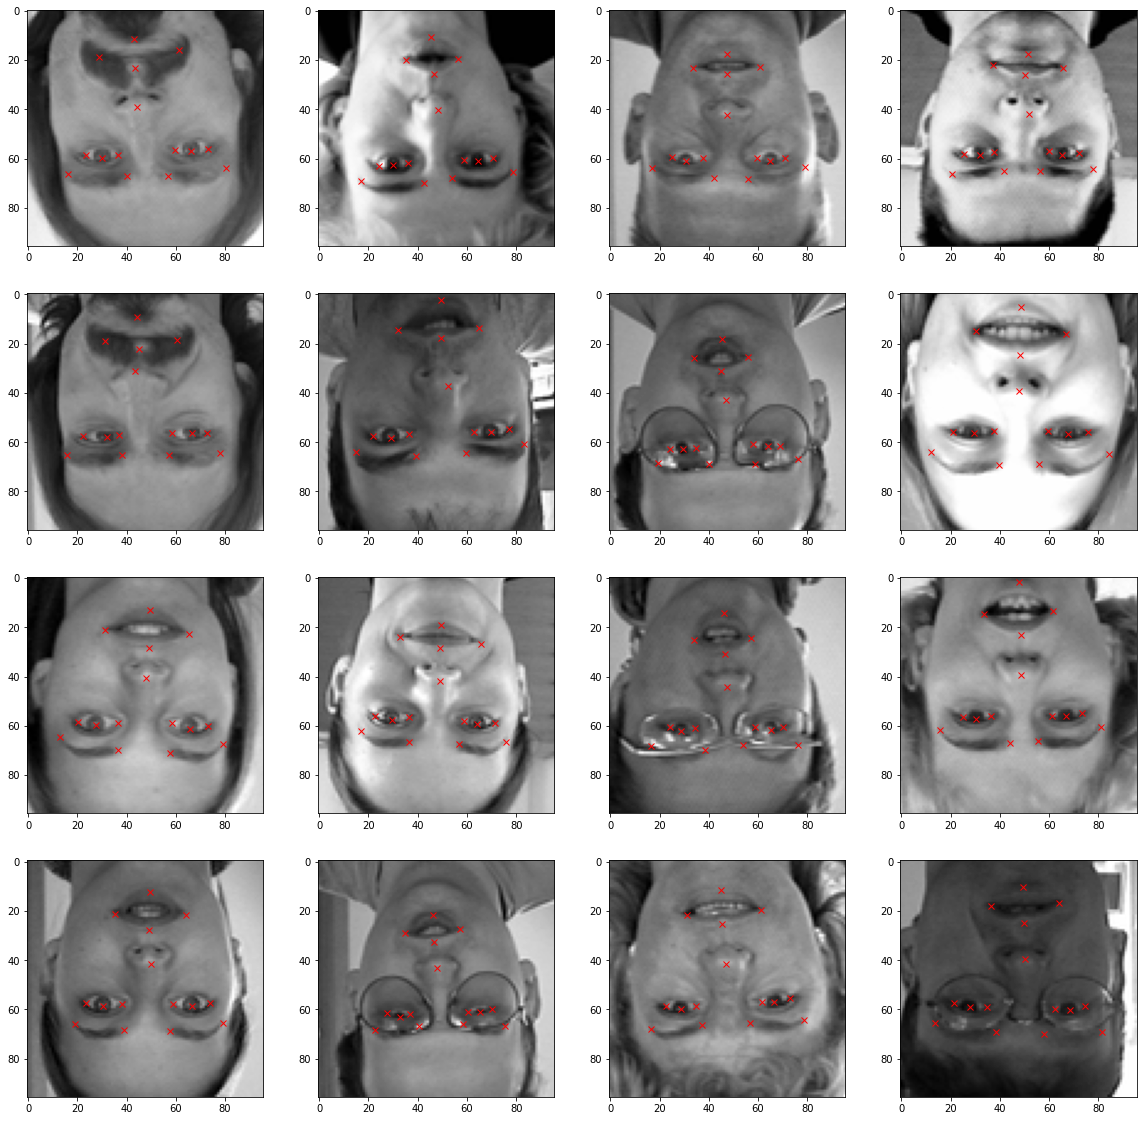

In [34]:
facialpoints_df_copy = copy.copy(facialpoints_df)
# Flip the image column vertically (note that axis = 0) 
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))
# Since we are flipping the images vertically, x coordinate values would be the same
# y coordinate values only would need to change, all we have to do is to subtract our initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )


# View the Vertically flipped images
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(facialpoints_df_copy['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[i][j-1], facialpoints_df_copy.loc[i][j], 'rx')

In [ ]:
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

In [ ]:
# Convert facialpoints_df_augmented back to a pandas DataFrame
facialpoints_df_augmented = pd.DataFrame(facialpoints_df_augmented, columns=list(columns) + ['Image'])

# Convert the NumPy arrays in the 'Image' column to space-separated string representations
facialpoints_df_augmented['Image'] = facialpoints_df_augmented['Image'].apply(lambda x: ' '.join(x.flatten().astype(str)))


In [ ]:
# Check if the conversion is looks good.
facialpoints_df_augmented['Image'][0]

In [ ]:
# Save augmented DataFrame
facialpoints_df_augmented.to_csv('../data/augmented_data.csv', index=False)